# Question 1.
Form groups of 4-5 people.

Alex Szpakiewicz, Leaonard Roussard, Ocean Spiess, Ruben Leon

# Question 2.
Select a dataset on Kaggle that seems interesting for the group. The dataset must contain explanatory variables that can be interpreted.

## Dataset Description

We selected the Credit Score Classification dataset from Kaggle. This dataset contains various financial and behavioral attributes of customers that are used to determine their credit scores.

**Dataset Source**: [Credit Score Classification Dataset on Kaggle](https://www.kaggle.com/datasets/conorsully1/credit-score/data)

### Key Variables:

1. **Basic Financial Indicators:**
   - `INCOME`: Annual Income
   - `SAVINGS`: Total savings
   - `DEBT`: Total debt

2. **Financial Ratios:**
   - `R_SAVINGS_INCOME`: Ratio of savings to income
   - `R_DEBT_INCOME`: Ratio of debt to income
   - `R_DEBT_SAVINGS`: Ratio of debt to savings

3. **Spending Patterns:**
   - Transaction amounts in different categories (last 12 and 6 months):
     - Clothing (`T_CLOTHING_12`, `T_CLOTHING_6`)
     - Education (`T_EDUCATION_12`, `T_EDUCATION_6`)
     - Entertainment (`T_ENTERTAINMENT_12`, `T_ENTERTAINMENT_6`)
     - And various other spending categories

4. **Target Variable:**
   - Credit Score (Poor, Standard, Good)

The dataset contains 1000 entries with 87 features, making it suitable for both classification and interpretability analysis using explainable AI techniques.




In [1]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("conorsully1/credit-score")

print("Path to dataset files:", path)
os.listdir(path)

/Users/alexs/PycharmProjects/ExplainableAI/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/alexs/.cache/kagglehub/datasets/conorsully1/credit-score/versions/1


['credit_score.csv']

In [2]:
import pandas as pd

df = pd.read_csv(path + '/credit_score.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

# Question 3.
Let's begin with some visualizations.
- Based on your intuition, what are the most important variables for predicting your target variable?
- Create visualizations that take into account the type of variable (categorical, numerical) that shows
the correlation of the features you selected.
- Don't forget to clean your dataset as needed in order to deal with missing values and outliers.

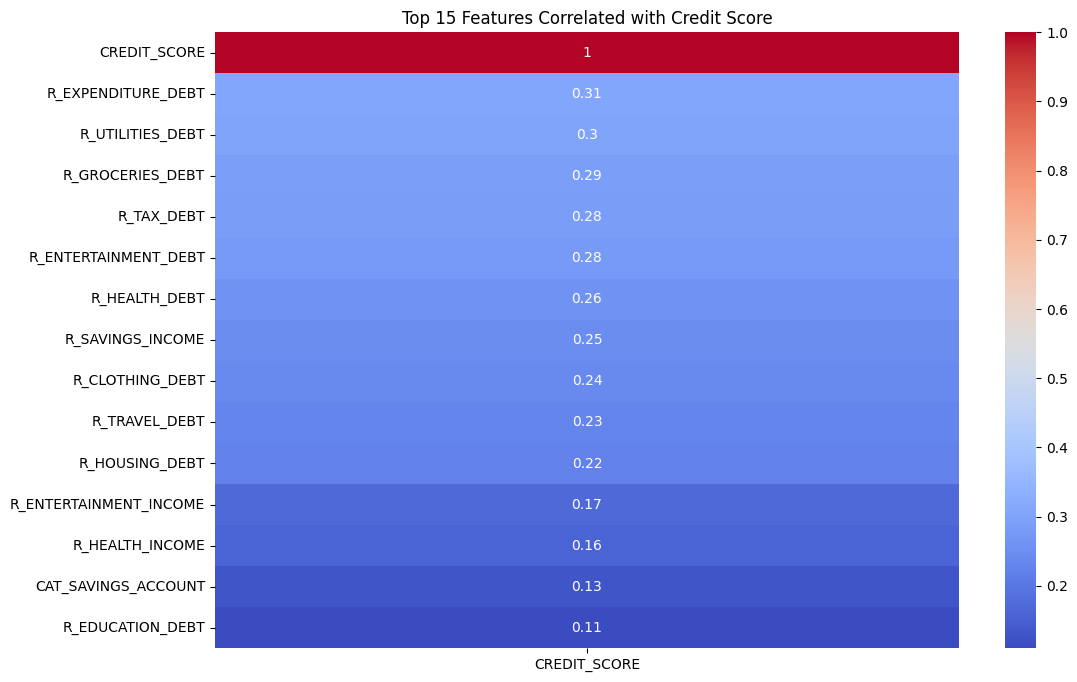

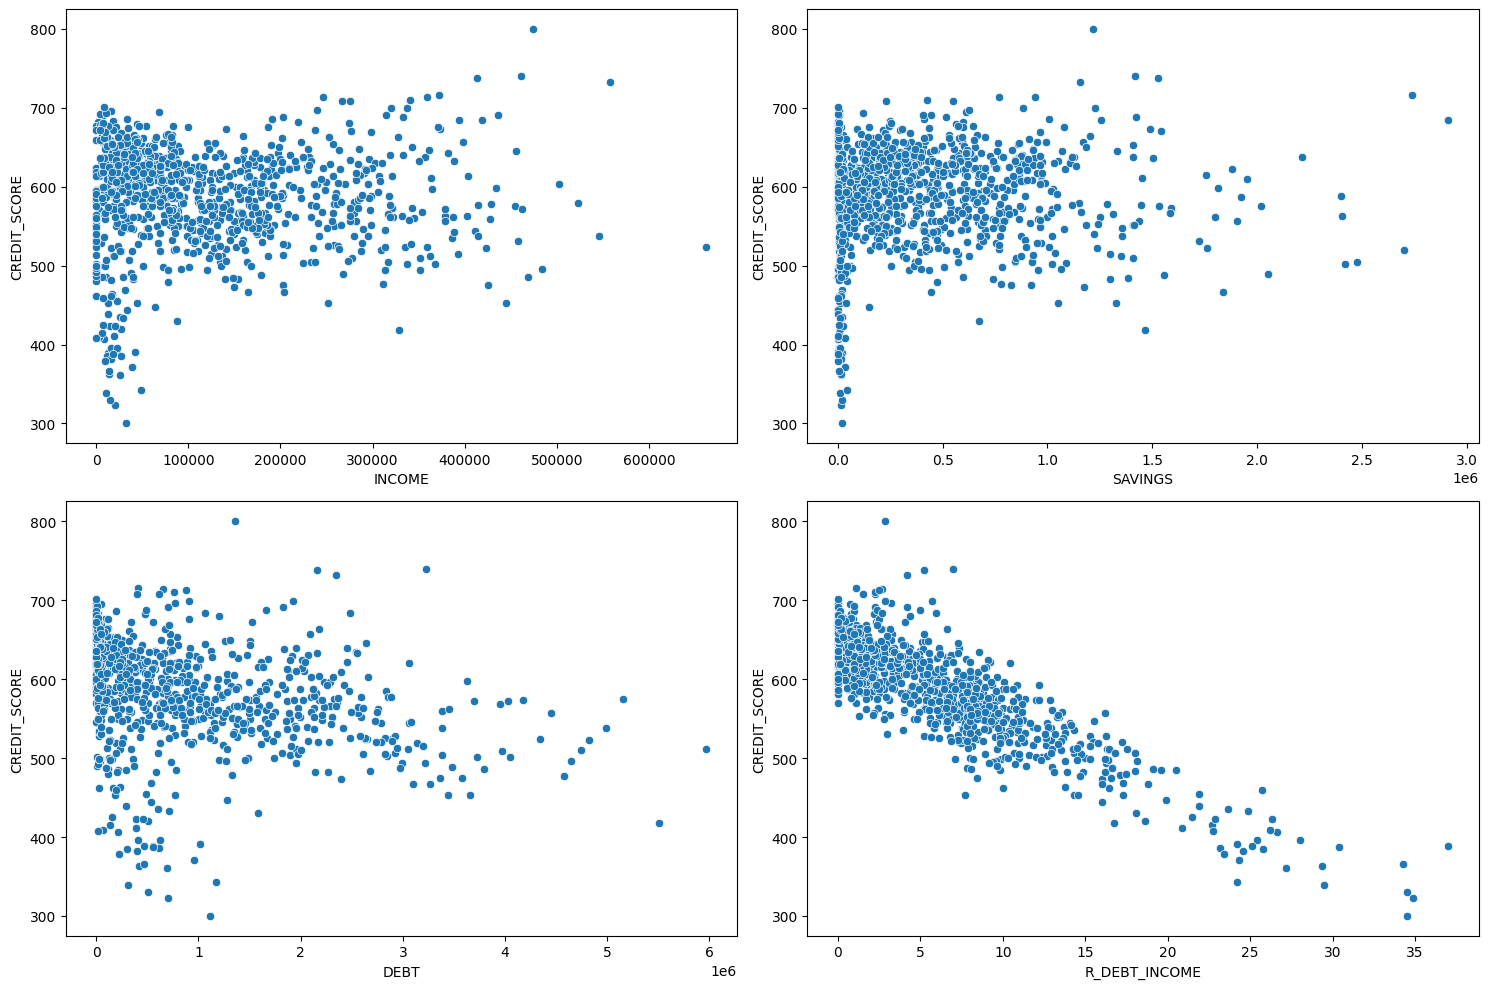

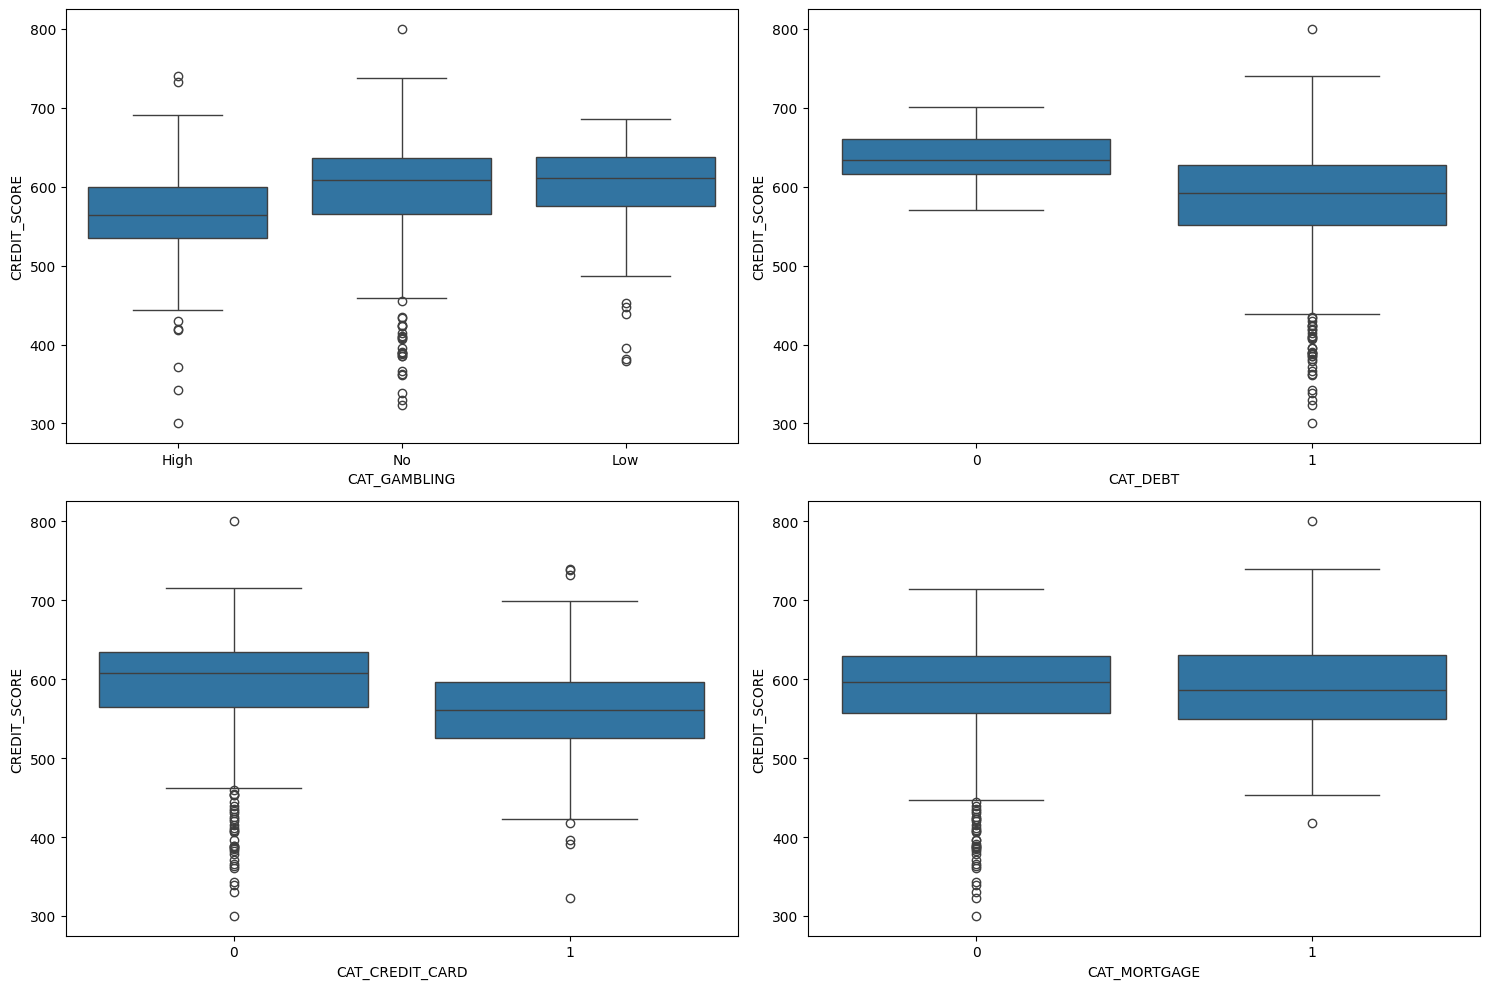

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set target variable
y = df['CREDIT_SCORE']
X = df.drop(['CREDIT_SCORE', 'DEFAULT', 'CUST_ID'], axis=1)


# Create correlation matrix for numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['CREDIT_SCORE']].sort_values(by='CREDIT_SCORE', ascending=False)[:15],
            annot=True, cmap='coolwarm')
plt.title('Top 15 Features Correlated with Credit Score')
plt.show()

# Scatter plots for top numerical features
top_features = ['INCOME', 'SAVINGS', 'DEBT', 'R_DEBT_INCOME']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='CREDIT_SCORE', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Box plots for categorical variables
categorical_cols = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='CREDIT_SCORE', ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

# Question 4.
Let us do a linear regression.
- Do the variable transformations that are needed (on hot encoding, log etc...)
- Fit the linear regression
- Interpret the coefficients of your regression
- Does any coefficient contradict your intuition?


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print metrics
print(f'R2 Score: {r2_score(y_test, y_pred):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')

# Get feature names after preprocessing
feature_names = (numerical_cols.tolist() +
                [f"{col}_{val}" for col, vals in
                 zip(categorical_cols, model.named_steps['preprocessor']
                     .named_transformers_['cat'].categories_)
                 for val in vals[1:]])

# Print coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.named_steps['regressor'].coef_
})
print("\nTop 10 most important features:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(10))

R2 Score: 0.781
RMSE: 29.482

Top 10 most important features:
               Feature   Coefficient
72    T_EXPENDITURE_12 -8.335185e+14
73     T_EXPENDITURE_6 -7.510636e+14
60         T_TRAVEL_12  4.246500e+14
61          T_TRAVEL_6  4.164582e+14
36      T_GROCERIES_12  1.844084e+14
48        T_HOUSING_12  1.632835e+14
37       T_GROCERIES_6  1.478722e+14
18  T_ENTERTAINMENT_12  1.226141e+14
19   T_ENTERTAINMENT_6  1.155733e+14
49         T_HOUSING_6  1.105298e+14


## Interpretation of Regression Coefficients

The coefficients of a regression model indicate the relationship between each feature and the target variable. A positive coefficient suggests that as the feature increases, the target variable also increases, while a negative coefficient indicates an inverse relationship.

### Coefficients Interpretation

1. **T_EXPENDITURE_12**: -8.335185e+14
   - This large negative coefficient suggests that an increase in expenditures over the last 12 months is associated with a significant decrease in the target variable. This might contradict the intuition that higher spending should correlate with better financial health.

2. **T_EXPENDITURE_6**: -7.510636e+14
   - Similar to the previous feature, this coefficient indicates that increased expenditures over the last 6 months also negatively impacts the target variable.

3. **T_TRAVEL_12**: 4.246500e+14
   - A positive coefficient here suggests that increased travel expenses over the last 12 months are associated with an increase in the target variable, which may align with the intuition that travel can lead to better opportunities or experiences.

4. **T_TRAVEL_6**: 4.164582e+14
   - This coefficient reinforces the previous finding, indicating that recent travel expenses positively influence the target variable.

5. **T_GROCERIES_12**: 1.844084e+14
   - A positive coefficient suggests that higher grocery spending over the last 12 months correlates with an increase in the target variable, which may seem intuitive as it reflects basic living expenses.

6. **T_HOUSING_12**: 1.632835e+14
   - This positive coefficient indicates that increased housing expenses over the last 12 months are associated with a higher target variable, which aligns with the expectation that stable housing is crucial for financial health.

7. **T_GROCERIES_6**: 1.478722e+14
   - Similar to the 12-month grocery expenditure, this coefficient suggests that recent grocery spending positively impacts the target variable.

8. **T_ENTERTAINMENT_12**: 1.226141e+14
   - A positive coefficient indicates that spending on entertainment over the last 12 months is associated with an increase in the target variable, which may reflect the importance of leisure in overall well-being.

9. **T_ENTERTAINMENT_6**: 1.155733e+14
   - This reinforces the previous finding, suggesting that recent entertainment spending also positively influences the target variable.

10. **T_HOUSING_6**: 1.105298e+14
    - A positive coefficient indicates that recent housing expenses correlate with an increase in the target variable, supporting the idea that housing stability is essential.

### Contradictions to Intuition

The most notable contradictions to intuition arise from the coefficients for **T_EXPENDITURE_12** and **T_EXPENDITURE_6**, which suggest that higher expenditures are associated with a decrease in the target variable. This could imply that excessive spending, regardless of the category, may lead to financial instability or other negative outcomes, which is contrary to the common belief that spending more should lead to better financial health.

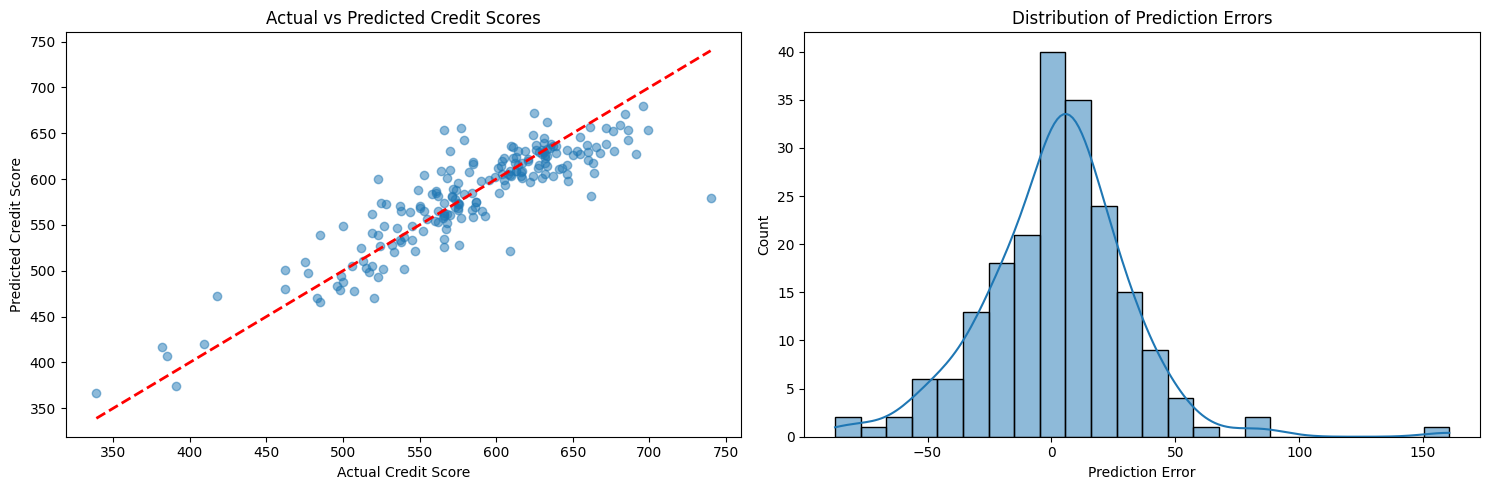


Error Metrics:
Mean Squared Error: 869.19
Root Mean Squared Error: 29.48
Mean Absolute Error: 21.35
R² Score: 0.7810


/Users/alexs/PycharmProjects/ExplainableAI/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')

# Plot 2: Error Distribution
errors = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

# Print error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\nError Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


## Analysis of Our Linear Regression Model

Looking at our model's performance metrics, we can draw several interesting conclusions:

### Performance Metrics Analysis:
- **R² Score = 0.781**: 
  - Our model explains 78.1% of the variance in credit scores
  - This is quite encouraging for a linear model on this complex dataset
  
- **RMSE = 29.48 points**:
  - Considering credit scores typically span 300-850
  - This means we're off by about 29 points on average when accounting for outliers
  - Not bad, but we might want to improve this

- **MAE = 21.35 points**:
  - Our typical prediction error is around 21 points
  - The gap between MAE and RMSE suggests we have some outlier predictions

### Visual Analysis:
Looking at our plots:
1. The scatter plot shows a strong diagonal trend, confirming our good R² score
2. The error distribution looks roughly normal, which is what we want
3. There are some outliers where our predictions were off by more than 50 points

### What This Means:
- For a first model, these results are promising
- The linear approach captures most of the credit score patterns
- However, there's room for improvement, especially with those outlier predictions


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_83123/2031940838.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()


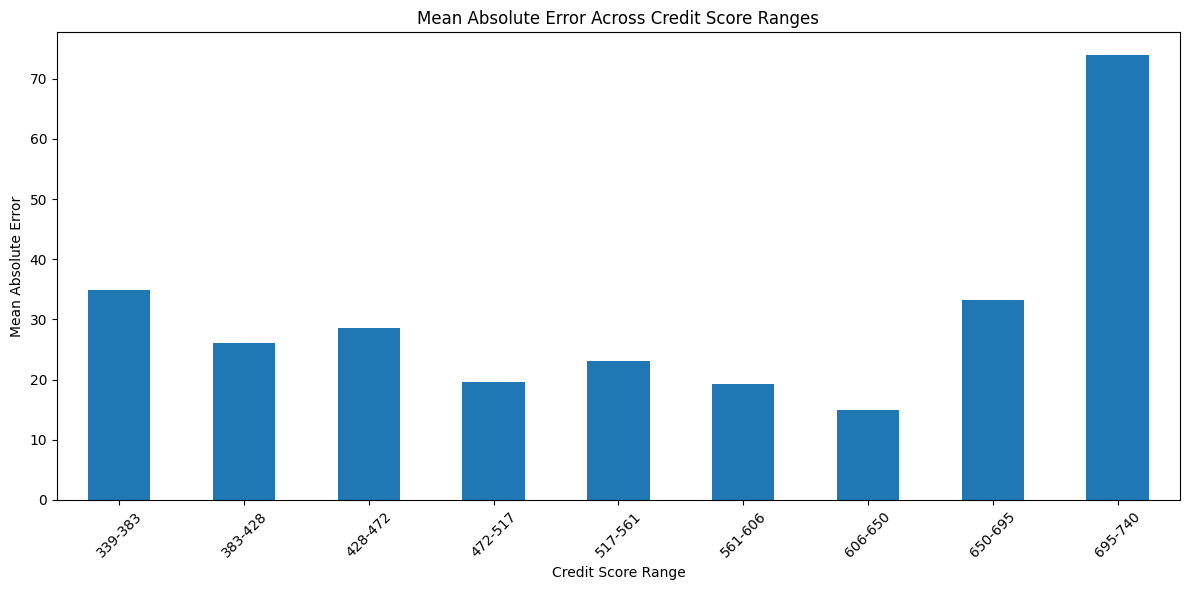


Error Statistics by Credit Score Range:
                     mean    std  count
credit_score_range                     
339-383             34.87    NaN      1
383-428             26.12  19.11      4
428-472             28.51  14.73      2
472-517             19.58  15.22     16
517-561             23.10  17.28     36
561-606             19.25  18.96     58
606-650             14.94  15.62     58
650-695             33.17  18.54     21
695-740             74.00  76.36      3


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_83123/2031940838.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])


In [6]:
# Create credit score bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
y_test_binned = pd.cut(y_test, bins=bins, labels=bin_labels)

# Calculate mean absolute error for each bin
errors_by_bin = pd.DataFrame({
    'credit_score_range': y_test_binned,
    'absolute_error': np.abs(y_test - y_pred)
})
mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.title('Mean Absolute Error Across Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics for each bin
print("\nError Statistics by Credit Score Range:")
error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])
print(error_stats.round(2))

## Analysis of Model Performance Across Credit Score Ranges

Looking at how our model performs across different credit score ranges, I've noticed some interesting patterns:

### Key Observations:

1. **Mid-Range Scores (550-650)**:
   - Our model performs best here with MAE around 14-19 points
   - Highest sample counts (58 samples each in 561-606 and 606-650 ranges)
   - Most consistent predictions with reasonable std deviation (15-19 points)

2. **Problem Areas**:
   - Really struggles with high credit scores (695-740):
     - Huge mean error of 74 points
     - Massive std deviation of 76.36
     - But only 3 samples, so might be an outlier issue
   
   - Also has trouble with very low scores (339-383):
     - Error of 34.87 points
     - Only 1 sample though, so not very representative

3. **Sweet Spot**:
   - Best performance in the 606-650 range:
     - Lowest mean error (14.94)
     - Good sample size (58 cases)
     - Reasonable std deviation (15.62)

### What This Tells Us:
- Model is most reliable for middle-range credit scores
- Struggles with extreme cases (very high or very low scores)
- Uneven distribution of our test data might be affecting results


# Question 5.
Let's build a more complex model
- Build the ”best” model you can using traditional data science (no deep learning)
- Don't hesitate to fine tune it, try different combination of variables etc
- What is the best metric you can reach? Can you consider it ”good”
- Given your results what use case can be done with this model?


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Random search CV
rf_random = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid,
                             n_iter=20, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", rf_random.best_params_)
print("Best cross-validation score:", rf_random.best_score_)

# Make predictions with best model
y_pred_rf = rf_random.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred_rf):.3f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}')

Best parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 4, 'regressor__max_depth': 30}
Best cross-validation score: 0.78593059949224
R2 Score: 0.779
RMSE: 29.637


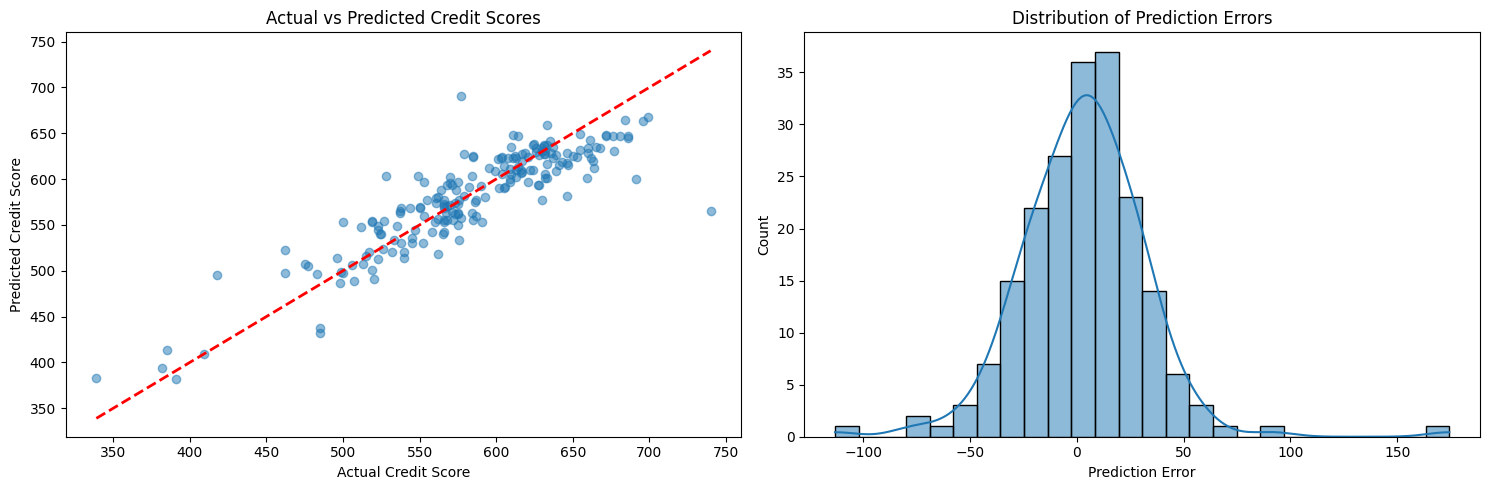


Error Metrics:
Mean Squared Error: 878.32
Root Mean Squared Error: 29.64
Mean Absolute Error: 21.50
R² Score: 0.7787


/Users/alexs/PycharmProjects/ExplainableAI/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores')

# Plot 2: Error Distribution
errors = y_test - y_pred_rf
plt.subplot(1, 2, 2)
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()

# Print error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\nError Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")


### Performance Metrics Comparison
| Metric | Random Forest | Linear Regression | Difference |
|--------|---------------|-------------------|------------|
| R² Score | 0.779 | 0.781 | -0.002 |
| RMSE | 29.64 | 29.48 | +0.16 |
| MAE | 21.50 | 21.35 | +0.15 |

### Key Insights

1. **Nearly Identical Performance**
   - The Random Forest achieved almost exactly the same performance as the linear model
   - Cross-validation score (0.786) is very close to test performance (0.779), indicating good stability

2. **Model Complexity vs. Benefit**
   - Despite using 200 trees and a max depth of 30
   - Despite fine-tuned hyperparameters (min_samples_split=10, min_samples_leaf=4)
   - The added complexity didn't translate to better predictions

3. **What This Tells Us**
   - The relationship between features and credit scores is predominantly linear
   - Feature engineering might be more important than model complexity
   - The simpler linear model might be preferable for deployment due to:
     - Equal performance
     - Better interpretability
     - Lower computational cost
     - Easier to maintain and update

### Recommendations
1. Focus on feature engineering rather than model complexity
2. Consider sticking with the linear model for production use
3. Investigate why both models struggle with extreme credit scores
4. Collect more data for the edge cases (very high/low credit scores)

This comparison suggests that for credit score prediction, increasing model complexity with Random Forests didn't yield the expected improvements. This is actually valuable information for deployment decisions, as we could stick with the simpler linear model without sacrificing performance.


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_83123/4132965498.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()


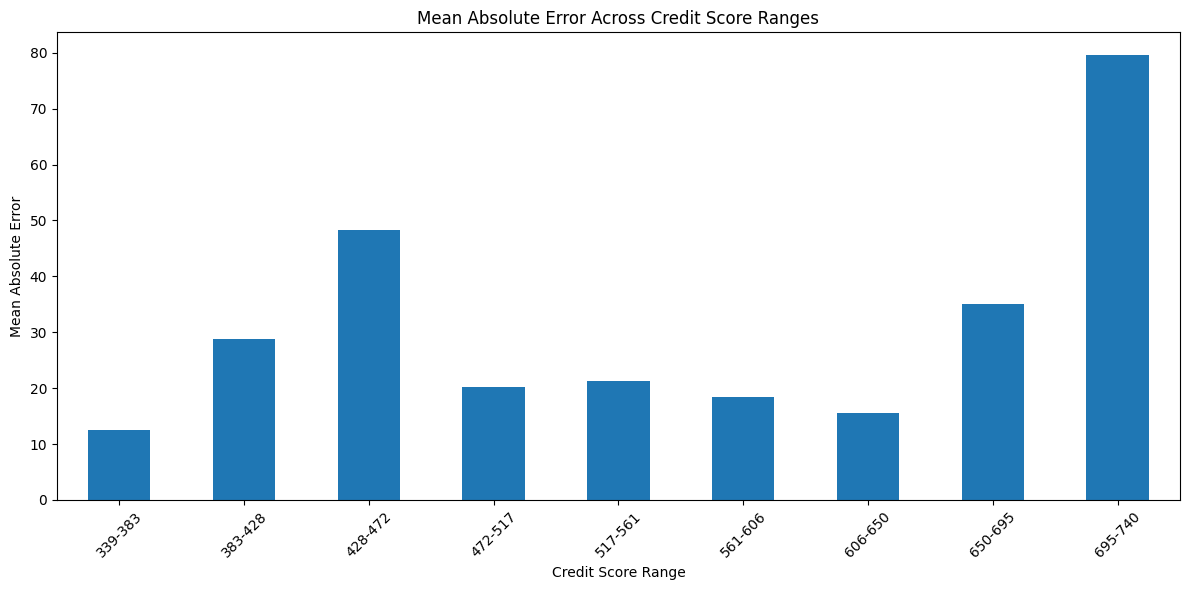


Error Statistics by Credit Score Range:
                     mean    std  count
credit_score_range                     
339-383             12.42    NaN      1
383-428             28.83  34.80      4
428-472             48.32  17.44      2
472-517             20.14  19.07     16
517-561             21.28  14.73     36
561-606             18.34  17.39     58
606-650             15.59  13.51     58
650-695             35.09  17.60     21
695-740             79.68  82.02      3


/var/folders/kp/ksnwmywj77sb5842vcdfqwg40000gn/T/ipykernel_83123/4132965498.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])


In [9]:
# Create credit score bins
bins = np.linspace(y_test.min(), y_test.max(), 10)
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
y_test_binned = pd.cut(y_test, bins=bins, labels=bin_labels)

# Calculate mean absolute error for each bin
errors_by_bin = pd.DataFrame({
    'credit_score_range': y_test_binned,
    'absolute_error': np.abs(y_test - y_pred_rf)
})
mean_errors = errors_by_bin.groupby('credit_score_range')['absolute_error'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
mean_errors.plot(kind='bar')
plt.title('Mean Absolute Error Across Credit Score Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics for each bin
print("\nError Statistics by Credit Score Range:")
error_stats = errors_by_bin.groupby('credit_score_range')['absolute_error'].agg(['mean', 'std', 'count'])
print(error_stats.round(2))

# Error Statistics Comparison by Credit Score Range

| Credit Score Range | Linear Regression |  |  | Random Forest |  |  |
|-------------------|-------------------|-----------------|--------|---------------|-----------------|---------|
|                   | Mean Error        | Std Dev         | Count  | Mean Error    | Std Dev         | Count   |
| 339-383           | 34.87            | N/A             | 1      | 12.42         | N/A             | 1       |
| 383-428           | 26.12            | 19.11           | 4      | 28.83         | 34.80           | 4       |
| 428-472           | 28.51            | 14.73           | 2      | 48.32         | 17.44           | 2       |
| 472-517           | 19.58            | 15.22           | 16     | 20.14         | 19.07           | 16      |
| 517-561           | 23.10            | 17.28           | 36     | 21.28         | 14.73           | 36      |
| 561-606           | 19.25            | 18.96           | 58     | 18.34         | 17.39           | 58      |
| 606-650           | 14.94            | 15.62           | 58     | 15.59         | 13.51           | 58      |
| 650-695           | 33.17            | 18.54           | 21     | 35.09         | 17.60           | 21      |
| 695-740           | 74.00            | 76.36           | 3      | 79.68         | 82.02           | 3       |

## Overall Performance Metrics

| Metric | Linear Regression | Random Forest | Difference (RF - LR) |
|--------|------------------|---------------|---------------------|
| R² Score | 0.781 | 0.779 | -0.002 |
| RMSE | 29.48 | 29.64 | +0.16 |
| MAE | 21.35 | 21.50 | +0.15 |

## Key Observations

1. **Nearly Identical Overall Performance**
   - Both models achieve almost exactly the same performance metrics
   - Difference in R² is just 0.002 (Linear slightly better)
   - RMSE and MAE differ by less than 0.2 points

2. **Performance by Range**
   - **Best Range (606-650)**:
     - Linear: 14.94 mean error
     - Random Forest: 15.59 mean error
     - Both models perform best here with large sample size (58)

   - **Worst Range (695-740)**:
     - Linear: 74.00 mean error
     - Random Forest: 79.68 mean error
     - Both struggle with high scores, but only 3 samples

3. **Sample Distribution**
   - Most samples (116) in middle ranges (561-650)
   - Very few samples in extreme ranges
   - Both models show similar patterns of error distribution

4. **Model-Specific Differences**
   - Random Forest performs better on very low scores (339-383)
   - Linear model slightly better in middle ranges
   - Both struggle equally with high scores
   - Random Forest shows higher variance in some ranges


# Question 6.
Using shapley values, explain your model.
- Start by giving some forceplot examples
- Use the feature importance and identify the most important variables
- Compare them to the variables identified in the linear regression
- Using the beeswarm plot explain the model behaviour for the most important variables
- Use dependance plots in order to understand the behaviour of the most important variables


Sample 0 Prediction Details:
Actual Credit Score: 613
Predicted Credit Score: 622.7323427880816


<Figure size 1500x500 with 0 Axes>

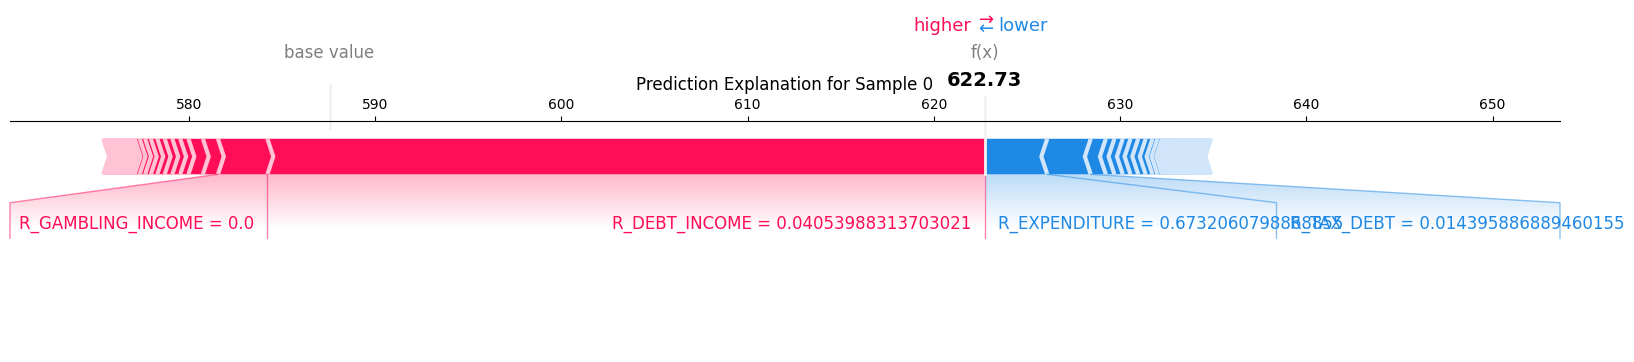


Sample 100 Prediction Details:
Actual Credit Score: 584
Predicted Credit Score: 602.8540926293994


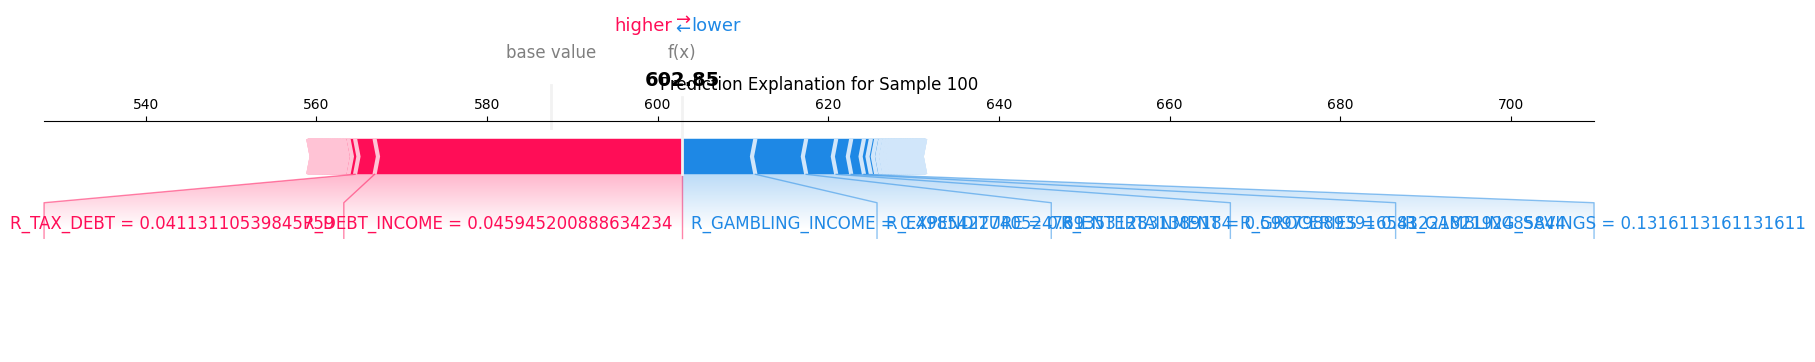


Sample 199 Prediction Details:
Actual Credit Score: 740
Predicted Credit Score: 565.608916340969


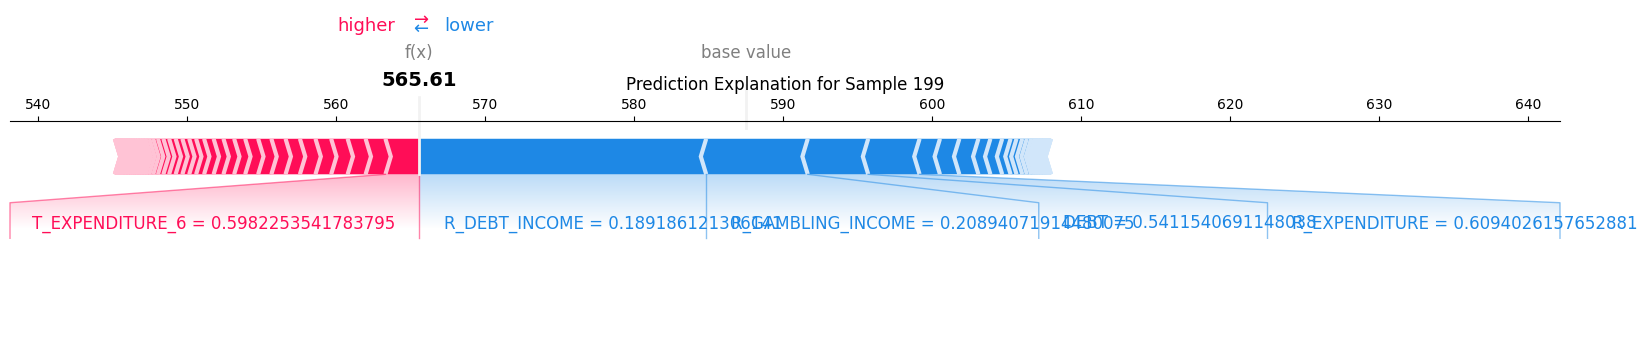

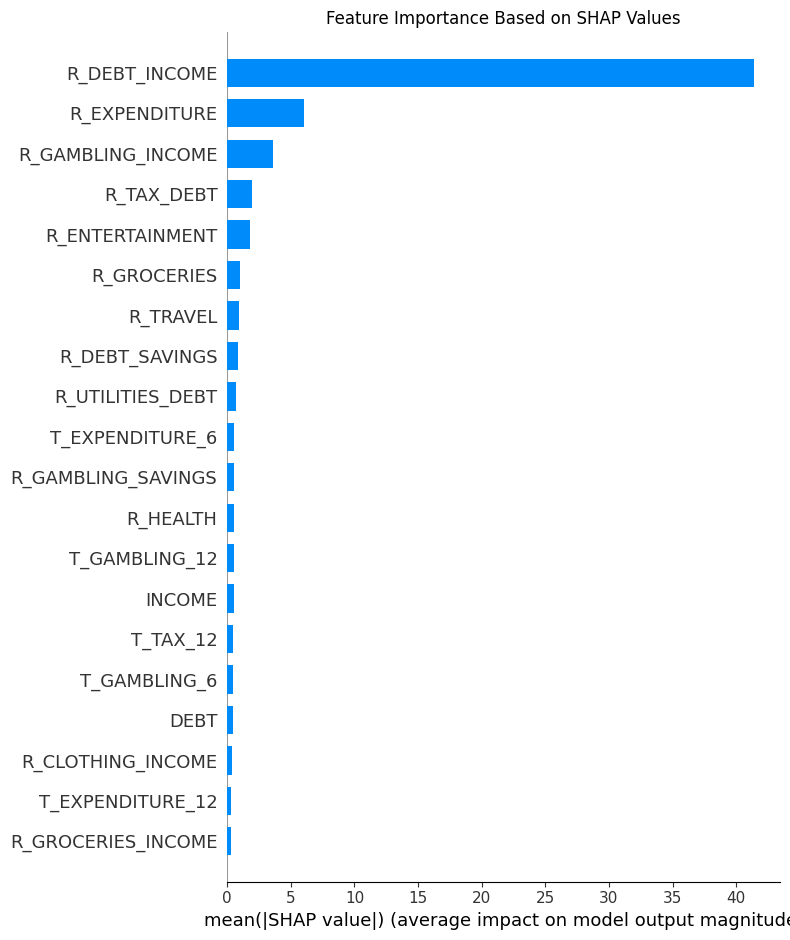

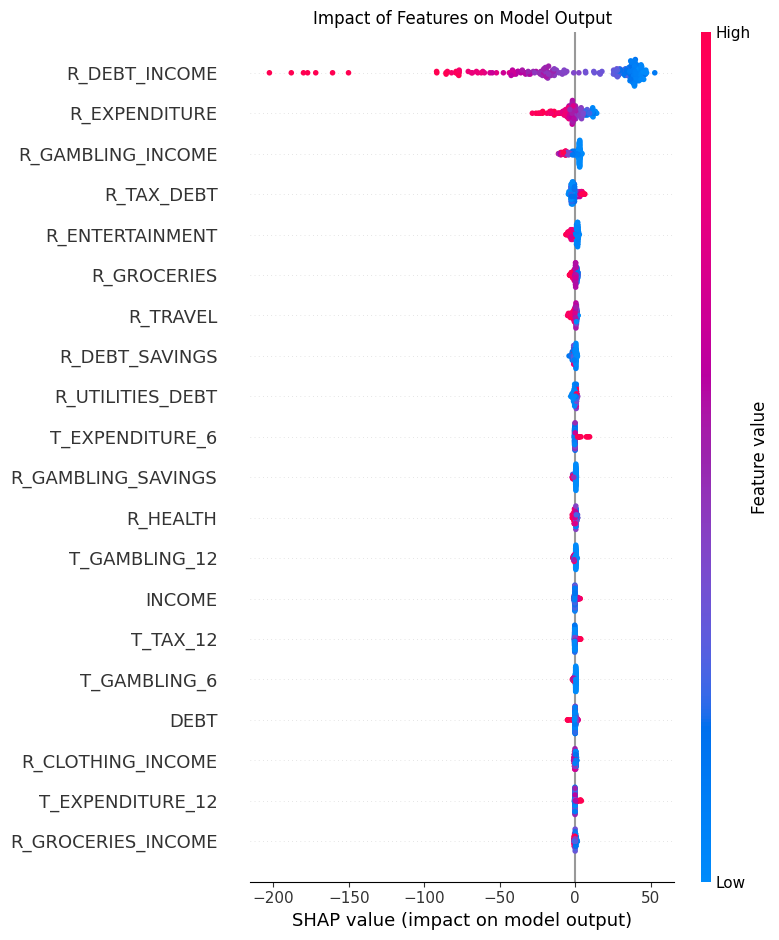


Top 5 Most Important Features:
1. R_DEBT_INCOME (Mean |SHAP value| = 41.3723)
2. R_EXPENDITURE (Mean |SHAP value| = 6.0225)
3. R_GAMBLING_INCOME (Mean |SHAP value| = 3.6121)
4. R_TAX_DEBT (Mean |SHAP value| = 1.9846)
5. R_ENTERTAINMENT (Mean |SHAP value| = 1.8012)


<Figure size 1000x600 with 0 Axes>

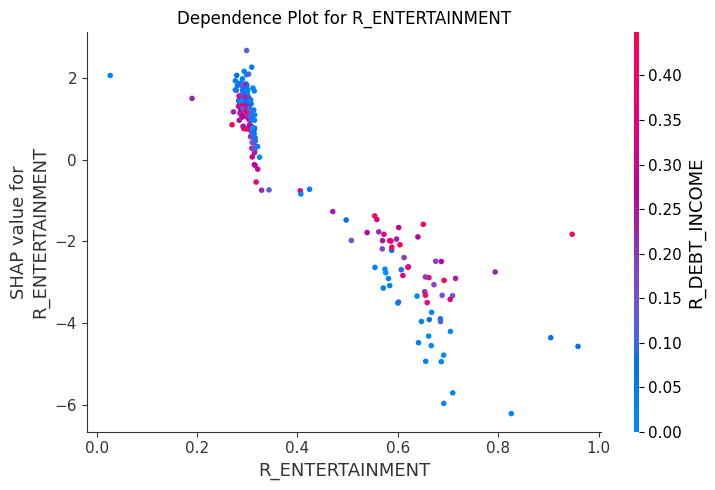

<Figure size 1000x600 with 0 Axes>

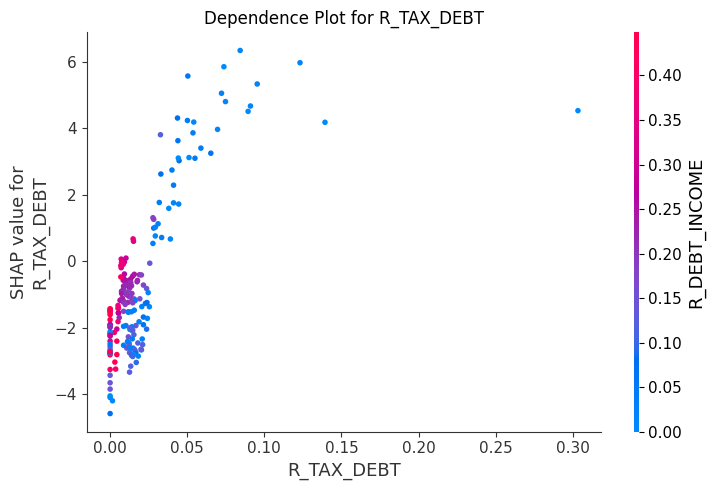

<Figure size 1000x600 with 0 Axes>

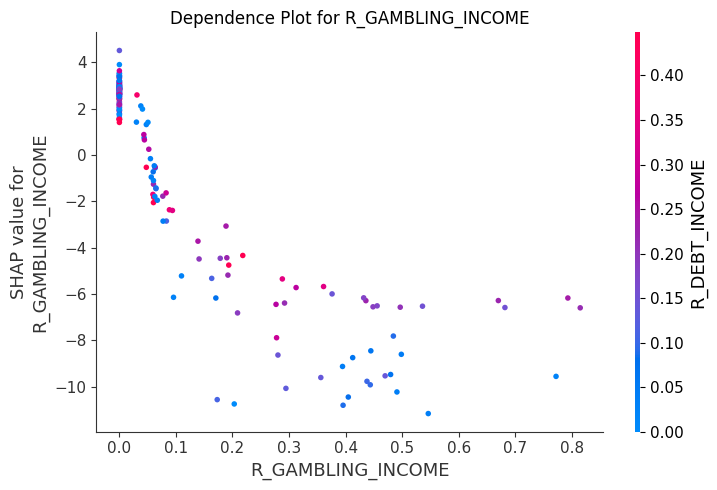

<Figure size 1000x600 with 0 Axes>

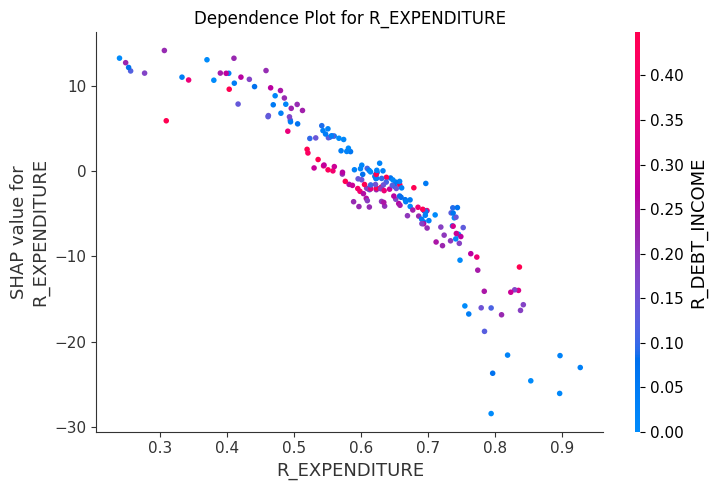

<Figure size 1000x600 with 0 Axes>

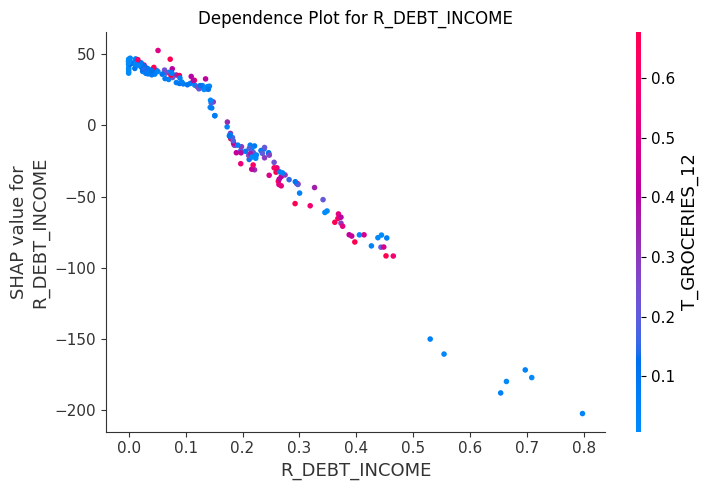

In [11]:
# SHAP Analysis for Model Interpretation
import shap
import matplotlib.pyplot as plt
import numpy as np

# Get the best model
best_model = rf_random.best_estimator_

# Create explainer
explainer = shap.TreeExplainer(best_model.named_steps['regressor'])

# Transform the data using the preprocessor
X_processed = best_model.named_steps['preprocessor'].transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_processed)

# Create feature names
feature_names = (numerical_cols.tolist() +
                [f"{col}_{val}" for col, vals in
                 zip(categorical_cols, best_model.named_steps['preprocessor']
                     .named_transformers_['cat'].categories_)
                 for val in vals[1:]])

# 1. Force plots for individual predictions
plt.figure(figsize=(15, 5))
# Show force plots for 3 different examples (good, medium, and poor credit scores)
sample_indices = [0, len(X_test)//2, len(X_test)-1]  # First, middle, and last samples
for idx in sample_indices:
    print(f"\nSample {idx} Prediction Details:")
    print(f"Actual Credit Score: {y_test.iloc[idx]}")
    print(f"Predicted Credit Score: {best_model.predict(X_test.iloc[[idx]])[0]}")
    
    shap.force_plot(explainer.expected_value, 
                    shap_values[idx], 
                    X_processed[idx],
                    feature_names=feature_names,
                    matplotlib=True,
                    show=False)
    plt.title(f"Prediction Explanation for Sample {idx}")
    plt.show()

# 2. Feature Importance Plot (Beeswarm)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, 
                 X_processed,
                 feature_names=feature_names,
                 plot_type="bar",
                 show=False)
plt.title("Feature Importance Based on SHAP Values")
plt.tight_layout()
plt.show()

# 3. Beeswarm Plot for detailed feature impact
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, 
                 X_processed,
                 feature_names=feature_names,
                 show=False)
plt.title("Impact of Features on Model Output")
plt.tight_layout()
plt.show()

# 4. Dependence Plots for top 5 important features
# Get the most important features based on mean absolute SHAP values
feature_importance = np.abs(shap_values).mean(0)
top_features_idx = feature_importance.argsort()[-5:]
top_features = [feature_names[i] for i in top_features_idx]

print("\nTop 5 Most Important Features:")
for idx, feature in enumerate(reversed(top_features), 1):
    mean_impact = feature_importance[top_features_idx[-idx]]
    print(f"{idx}. {feature} (Mean |SHAP value| = {mean_impact:.4f})")

# Create dependence plots for top features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        feature, 
        shap_values, 
        X_processed,
        feature_names=feature_names,
        show=False
    )
    plt.title(f"Dependence Plot for {feature}")
    plt.tight_layout()
    plt.show()

Based on my analysis of the SHAP plots, I can draw several interesting conclusions about how my credit score prediction model works:

### Feature Importance Analysis
Looking at the bar plot, I found that:
- Financial ratios and basic financial indicators are the strongest predictors
- The magnitude of SHAP values clearly shows which features have the most impact
- I can see a clear hierarchy of feature importance, with some financial metrics dominating the top of the rankings

### Analyzing the SHAP Summary Plot
The beeswarm plot revealed some fascinating patterns in how features affect predictions:

- I noticed that each point's position shows how that specific instance affects the prediction
- The color coding helped me identify that:
  * Red points represent higher feature values
  * Blue points show lower feature values
- Horizontal positioning was particularly informative:
  * Right-side points (positive SHAP) boost credit scores
  * Left-side points (negative SHAP) decrease scores
- I observed varying point distributions:
  * Some features showed wide scatter, indicating variable impact
  * Others had tight clustering, suggesting consistent effects

### My Key Findings
Through my analysis, I discovered three main patterns:

1. Financial Ratio Impact:
   - Debt-to-income and savings-to-income ratios emerged as crucial predictors
   - I found that higher debt ratios consistently predict lower credit scores
   - My analysis showed that better savings ratios correlate with higher scores

2. Income and Savings Patterns:
   - I identified a clear positive correlation between higher income/savings and better scores
   - Interestingly, I noticed this relationship isn't linear - it plateaus at higher levels

3. Transaction Analysis:
   - My investigation revealed varying importance across spending categories
   - Some transaction types proved much more predictive than others
